# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2019-2020 учебный год

Лектор: Илья Щуров

Семинаристы: Соня Дымченко, Руслан Хайдуров

# План на сегодня

- вокруг да около линейной регрессии
- feature selection и регуляризация: теория и практика!

## Отбор признаков и регуляризация
На лекции мы обсуждали, что в задаче линейной регрессии (и, на самом деле, не только в ней) иногда лучше отбросить какие-то признаки (то есть принудительно установить соответствующую компоненту вектора весов в 0), чтобы уменьшить разброс вектора весов (и получающихся предсказаний) — даже ценой появления смещённости. Это называется «отбор признаков» (feature selection).

Сейчас мы поговорим о другом методе уменьшения разброса: регуляризации.

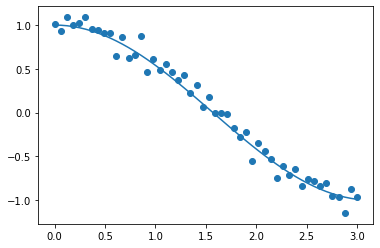

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3, 50)
eps = np.random.normal(0, 0.1, size=x.shape)
y = np.cos(x) + eps

plt.scatter(x, y)
plt.plot(x, y - eps)
plt.show()

(6, 50)

In [31]:
np.vstack([np.zeros(12), np.ones(12)]).T

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

/home/sorain/.conda/envs/sorains_env/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.66356e-19): result may not be accurate.
  overwrite_a=True).T


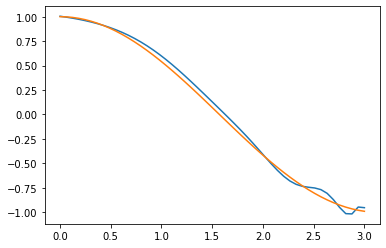

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 100)

In [40]:
from sklearn.linear_model import LinearRegression, Ridge
features = np.vstack([x**i for i in range(20)]).T
lr = Ridge()

lr.fit(features, y)

y_pred = lr.predict(features)
plt.plot(x, y_pred)
plt.plot(x, y - eps)
plt.show()

x_test = np.linspace(0, 3, 100)
eps_new = np.random.normal(0, 0.1, size=x_test.shape)
y_test = np.cos(x_test) + eps_new

plt.plot(x_test, lr.predict(np.vstack([x_test**i for i in range(100)])).T)

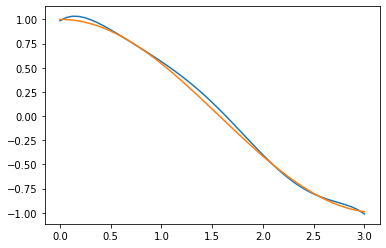

In [16]:
from sklearn.linear_model import Lasso

L

### Задача 1
Пусть, как обычно, $X$ — матрица объект-признак (которую мы считаем фиксированной), $w$ — фиксированный вектор весов (истинный), $y=Xw+\varepsilon$ — вектор ответов, $\varepsilon$ — вектор случайных ошибок, $\mathbb E[\varepsilon]=0$, ковариацонная матрица $\varepsilon$ равна $\sigma^2 I$, где $I$ — тождественная матрица (то есть все компоненты вектора $\varepsilon$ имеют одинаковую дисперсию $\sigma^2$, и любая пара разных компонент имеют нулевую ковариацию).

Рассмотрим следующиую оптимизационную задачу:

$$\| X\widehat w - y \| + \lambda \| \widehat w \|^2 \to \min_{\widehat w}, \quad \lambda > 0.$$

Слагаемое $\lambda \| \widehat w \|^2$ называется *регуляризатором*. Он «штрафует» большие значения компонент $w$.

1. Найти её решение в явном виде. 
2. Что будет, если $\lambda$ очень большой? Очень маленький?
2. Если столбцы матрицы $X$ оказались линейно зависимы, однозначно ли определяется $\widehat w$?
2. Является ли полученная таким образом оценка $\widehat w$ несмещённой оценкой для $w$?

**Замечание.** Регрессия, заданная таким образом, называется *гребнёвой* (ridge) регрессией.

### Задача 2
Пусть в условиях задачи 1 матрица $X$ имеет вид:

$$X=\begin{pmatrix}
10 & 0\\
-10 & 0\\
0 & 1\\
0 & -1
\end{pmatrix}.$$

Какая из компонент вектора $w$ сильнее уменьшится в результате добавления регуляризатора? Как вы можете это объяснить? Сравните с обсуждением отбора признаков в этом сюжете.

# Practice

In [45]:
! ls -laht 

total 3.1M
drwxrwxr-x.  3 sorain sorain 4.0K Mar  4 12:46 .
-rw-rw-r--.  1 sorain sorain  81K Mar  4 12:46 sem06.ipynb
-rw-rw-r--.  1 sorain sorain 1.5M Mar  4 12:43 crimedata.csv.1
drwxrwxr-x. 12 sorain sorain 4.0K Mar  4 12:00 ..
-rw-rw-r--.  1 sorain sorain 1.5M Mar  4 12:00 crimedata.csv
drwxrwxr-x.  2 sorain sorain 4.0K Mar  4 12:00 .ipynb_checkpoints


In [42]:
! wget https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem06_regularization/crimedata.csv

--2020-03-04 12:43:44--  https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem06_regularization/crimedata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1555521 (1.5M) [text/plain]
Saving to: ‘crimedata.csv.1’

crimedata.csv.1     100%[===================>]   1.48M  3.39MB/s    in 0.4s    

2020-03-04 12:43:50 (3.39 MB/s) - ‘crimedata.csv.1’ saved [1555521/1555521]



Мы поработаем с данными о сообществах в США. Описание датасета:

http://archive.ics.uci.edu/ml/datasets/communities+and+crime

Датасет на кэггле (в формате .csv):

https://www.kaggle.com/kkanda/communities%20and%20crime%20unnormalized%20data%20set

Будем предсказывать количество насильственных преступлений относительно численности населения.

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
data = pd.read_csv('crimedata.csv', na_values=["?"])
# будем работать не со всеми колонками
requiredColumns = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
data = data[data.columns[requiredColumns]]
# некоторые значения целевой переменной пропущены
X = data.loc[data['ViolentCrimesPerPop'].notnull(), :].drop('ViolentCrimesPerPop', axis=1)
y = data['ViolentCrimesPerPop'][X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
data

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
4,11245,2.76,24.46,40.53,28.69,12.65,0,0.00,17390,69.33,...,23.2,12.9,2,0,1.74,73.75,42.22,60.34,89.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,15.46,30.16,14.34,8.08,56216,100.00,24727,75.05,...,22.6,11.7,64,0,18.90,52.67,39.19,74.58,85.88,545.75
2211,12251,2.68,17.36,31.23,16.97,12.57,12251,100.00,20321,75.06,...,17.3,14.4,0,0,2.24,75.16,49.12,78.79,92.85,124.10
2212,32824,2.46,11.81,20.96,9.53,20.73,32824,100.00,27182,59.79,...,23.9,13.1,44,0,7.35,48.66,46.73,75.54,92.30,353.83
2213,13547,2.89,17.16,30.01,14.73,10.42,0,0.00,19899,71.67,...,23.3,14.1,0,0,2.28,82.26,54.05,79.72,94.06,691.17


### 1 Baseline

Обучите линейную регрессию и выведите качество по метрикам $R^2$ и MSE на обучающей и тестовой выборке.

In [46]:
# your code here
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train, y_train)

r2_score(y_test, lr.predict(X_test))

0.4955445227943661

Добавьте регуляризатор и посмотрите, изменилось ли качество. Попробуйте методы Lasso ($L_1$) и Ridge ($L_2$). Попробуйте также KNN.

**Комментарий.** $L_1$-регуляризатор — это просто $L_1$-норма вектора весов, то есть сумма модулей всех компонент.

In [82]:
# your code here
from sklearn.metrics import r2_score

lr = Ridge(alpha=0.1)

lr.fit(X_train, y_train)

r2_score(y_test, lr.predict(X_test))

0.49617255011000094

[]

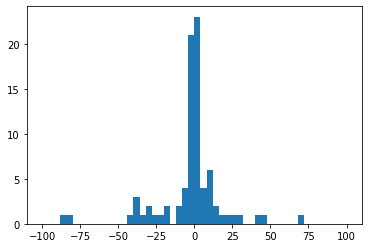

In [83]:
plt.hist(lr.coef_, range=(-100, 100), bins=50)
plt.plot()

In [56]:
# your code here
from sklearn.metrics import r2_score

lr = Lasso(alpha=100)

lr.fit(X_train, y_train)

r2_score(y_test, lr.predict(X_test))

/home/sorain/.conda/envs/sorains_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109601722.3636522, tolerance: 54853.35376255959
  positive)


0.29668597290404997

In [58]:
(lr.coef_ > 0).sum()

17

Попробуйте поизменять параметр регуляризации ($\lambda$) и посмотреть, что получится. Что будет с происходить с коэффициентами регрессии при увеличении параметра регуляризации?

In [ ]:
# your code here

### 2 Scaling

А что изменится при нормировании признаков? Попробуйте StandardScaler и MinMaxScaler. Есть ли разница? Влияет ли нормирование на предсказания линейной регрессии? А на предсказания регуляризованной? Почему так?

In [93]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
lr = Ridge(10)

pipeline = Pipeline([("scaler", scaler),
                     ("scaler2", MinMaxScaler()),
                     ("model", lr)
                    ])

pipeline.fit(X_train, y_train)
r2_score(y_test, pipeline.predict(X_test))

0.5941911731447536

### 3 High/low variance

Полезны ли признаки, имеющие высокую дисперсию? А низкую? Попробуйте удалить их и посмотреть, как изменится качество.

In [94]:
features_variance = X_train.var().sort_values(ascending=False)

In [ ]:
# your code here

### 4 Correlation

Попробуйте теперь избавиться от самых коррелирующих признаков и посмотрите на изменение качества.

In [ ]:
correlated_features = X.corr(method='pearson').abs().unstack().sort_values(ascending=False)

In [ ]:
# your code here

### 5 Сombination!

Скомбинируйте нормализацию с выбором признаков и посмотрите, изменилось ли качество.

In [ ]:
# your code here

### 6 Hyperparameter tuning

Какой метод обработки данных сработал лучше всех? Используя его, подберите параметр регуляризации и посмотрите на финальное качество!

In [ ]:
# your code here